In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("student-mat.csv", sep=';')
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [12]:
data['Performance'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [13]:
features = ['studytime', 'absences', 'G1', 'G2', 'Medu', 'Fedu', 'internet']
X = data[features].copy()
y = data['Performance']
X.loc[:, 'internet'] = X['internet'].map({'yes': 1, 'no': 0})
X = X.infer_objects(copy=False)
X.fillna(X.mean(), inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9243697478991597

Precision: 0.9848484848484849

Recall: 0.8904109589041096

F1-Score: 0.935251798561151

Confusion Matrix:
 [[45  1]
 [ 8 65]]


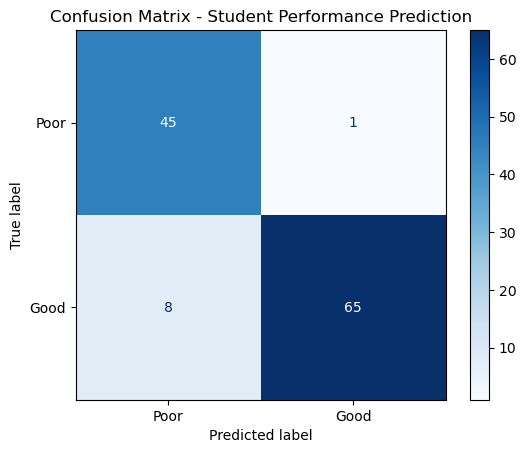

In [18]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=['Poor', 'Good']
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Student Performance Prediction")
plt.show()

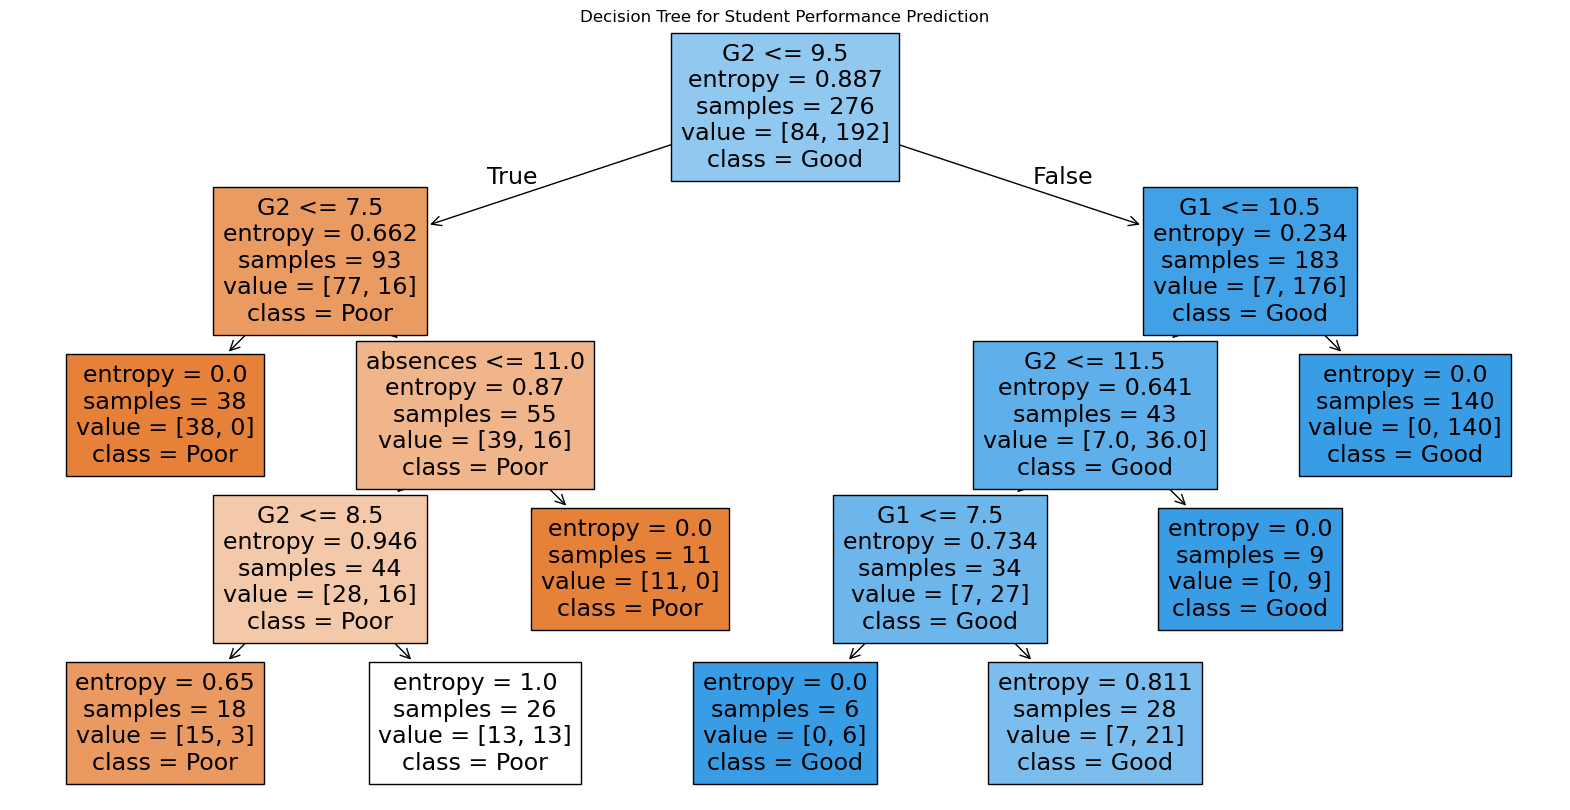

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=features,
    class_names=['Poor', 'Good'],
    filled=True
)
plt.title("Decision Tree for Student Performance Prediction")
plt.show()